# DH 140 Final Project: Inside the Scooby-Doo Verse

A a data analysis project by UCLA Digital Humanities student Varsha Hunter. 

Date: March 14, 2022

## Introduction

This project aims to explore the Scooby-Doo universe and answer some controversial questions about the Gang and their adventures capturing monsters and villains.

### Research Question: Who is the strongest and weakest link among the Gang? 

The Scooby-Doo Gang consists of five total members: Fred, Velma, Daphne, Shaggy, and Scooby-Doo. Fans of Scooby-Doo have their favorites for numerous reasons, however many may argue who is the strongest link and who is the weakest link among the gang. Is Velma the strongest because she is the smartest? Or is she the weakest because of her bad eyesight? Or is Fred the strongest due to his leadership qualities? Or is he the weakest because he brings nothing else to the table? This project may bring about controversy because the answer may not be what we expect due to personal opinions. However, we aim to answer this question using different metrics such as: the number of times each character has been abducted by a villain, the number of snacks they consume in an episode, and the number of villains they've captured themselves. Hopefully after our extensive analysis, we're able to come to a decisive conclusion.

### Project Scope

The goal of our project is to answer our research question through statistical analysis and visualizations using variables provided within the data. In addition to our research question, here are some supplementary questions we aim to answer in our analysis:

- Do Scooby Snacks improve the capabilities of each Gang member? In other words, does Scooby Snack consumption boost one's ability to capture villains? 
- Which Gang member captures the most monsters? Which Gang member captures the least? 


## Methods

Here we introduce our data and explain the methodology of our analysis.

### Looking at the Data:

This dataset was originally created by plummye and shared on Kaggle. However, I accessed the dataset in the form of a csv from Data.World. 

Here is a link to the dataset where all variables are explained and the csv can be downloaded: https://data.world/amberthomas/scooby-doo-tv-episodes-movies. 

#### Data Preview

In [2]:
#collapse_show

# imports
import pandas as pd 

In [64]:
#collapse_show

# Loading the Data 
og_scooby_df = pd.read_csv('scoobydoo.csv')

#Selecting rows relevant to TV series only 
scooby_df = og_scooby_df.loc[(og_scooby_df['format'] =='TV Series')| (og_scooby_df['format'] == 'TV Series (segmented)') | (og_scooby_df['format'] == 'Crossover')]
scooby_df.head(5)

index                 series_name network season  \
0      1  Scooby Doo, Where Are You!     CBS      1   
1      2  Scooby Doo, Where Are You!     CBS      1   
2      3  Scooby Doo, Where Are You!     CBS      1   
3      4  Scooby Doo, Where Are You!     CBS      1   
4      5  Scooby Doo, Where Are You!     CBS      1   

                       title  imdb  engagement  date_aired  run_time  \
0  What a Night for a Knight   8.1       556.0  1969-09-13        21   
1      A Clue for Scooby Doo   8.1       479.0  1969-09-20        22   
2       Hassle in the Castle   8.0       455.0  1969-09-27        21   
3     Mine Your Own Business   7.8       426.0  1969-10-04        21   
4      Decoy for a Dognapper   7.5       391.0  1969-10-11        21   

      format  ... batman scooby_dum scrappy_doo hex_girls blue_falcon  \
0  TV Series  ...  False      False       False     False       False   
1  TV Series  ...  False      False       False     False       False   
2  TV Series  ...  False      False       False     False       False   
3  TV Series  ...  False      False       False     False       False   
4  TV Series  ...  False      False       False     False       False   

        fred_va                  daphnie_va      velma_va    shaggy_va  \
0  Frank Welker  Stefanianna Christopherson  Nicole Jaffe  Casey Kasem   
1  Frank Welker  Stefanianna Christopherson  Nicole Jaffe  Casey Kasem   
2  Frank Welker  Stefanianna Christopherson  Nicole Jaffe  Casey Kasem   
3  Frank Welker  Stefanianna Christopherson  Nicole Jaffe  Casey Kasem   
4  Frank Welker  Stefanianna Christopherson  Nicole Jaffe  Casey Kasem   

     scooby_va  
0  Don Messick  
1  Don Messick  
2  Don Messick  
3  Don Messick  
4  Don Messick  

[5 rows x 75 columns]

This dataset has 75 columns or variables that represent different attributes for the characters, villains, ratings and more for every episode & movie within the Scooby Doo universe. We limited our dataset to only showcase the rows that pertained to the TV episode/series and excluded the movies for simplicity in our analysis. 

For our analysis, we will focus on these variables only:

- format: the media format (TV Episode) 
- monster_real: yes/no value that represents whether the monster was real or fake (human or not)
- caught_fred, caught_daphne, caught_velma, caught_shaggy, caught_scooby: whether the monster was caught by said Gang member
- captured_fred, captured_daphne, captured_velma,captured_shaggy, captured_scooby: whether the monster abducted/kidnapped said Gang member
- snack_fred, snack_daphne, snack_shaggy, snack_velma, snack_scooby: whether a scooby snack was eaten by said Gang member
- number_of_snacks: number of Scooby snacks eaten within an episode/movie


### Methodology:

In order to answer our research question, we conducted an exploratory analysis to get an understanding of the data. We first answered these general questions in our EDA: 

- What is the frequency of real and fake monsters within the Scooby Doo verse? Are most monsters fake or real?
- What is the mode number of snacks consumed in the series? 
- Who has consumed the most Scooby snacks over the course of the series? Who has consumed the least?

After answering these general questions, we moved onto finding an answer to our research question: Which member is the strongest and weakest link among the Gang? To answer this question, we determined: 

- The number of times each Gang member has been abducted by a real and fake Monster in total over the course of the series
- Determining the Rate of Successful Fake & Real Monsters by each Gang member 
- The number of snacks each Gang member has consumed vs. the number of monsters they've captured over the course of the series

## Results

Here we conduct our EDA, provide visuals, and answer the questions pertaining to our research question. 

### EDA

In [211]:
#collapse_show

# imports
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np


In our exploration of the data, we looked at the summary statistics for both episode imdb score and episode engagement in order to gage audience attitudes towards the series:

In [131]:
#hide

# Summary Statistics
stats_df = scooby_df[['imdb','engagement', 'monster_real', 'caught_fred', 'caught_daphnie', 'caught_velma', 'caught_shaggy', 'caught_scooby', 'captured_fred', 'captured_daphnie', 'captured_velma', 'captured_scooby', 'captured_shaggy', 'snack_fred', 'snack_daphnie', 'snack_velma', 'snack_shaggy', 'snack_scooby', 'number_of_snacks']]
stats_df.describe()

imdb   engagement
count  542.000000   542.000000
mean     7.353137    97.953875
std      0.682024   307.695098
min      4.600000     7.000000
25%      7.100000    26.000000
50%      7.400000    47.000000
75%      7.700000   101.000000
max      9.600000  6929.000000

As we can see, the average IMDB episode rating is 7.35 and the average user engagement is 97.95. In other words, audiences rate Scooby-Doo on average 7.35/10 and each episode gains approximately 98 reviews. The max amount of reviews left for an episode is 6929 and the max rating for an episode is 9.60. This lets us know that audiences have relatively positive opinions about the series and the gang members. We explore our data further below:   

#### What is the frequency of real and fake monsters within the Scooby Doo verse? Are most monsters fake or real?

In [65]:
#hide

# Number of Real & Fake Monsters 
real_monsters = scooby_df['monster_real'].sum()
fake_monsters = len(scooby_df['monster_real']) - real_monsters

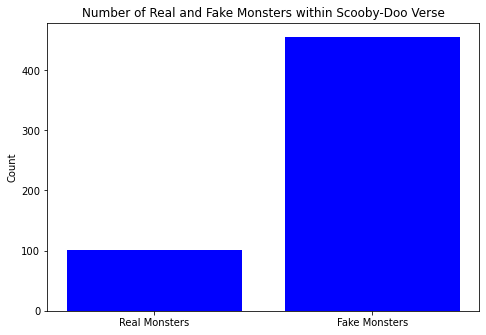

In [86]:
#hide

# Plotting Bar Chart
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
real_fake_monsters = ['Real Monsters', 'Fake Monsters']
number_real_fake_monsters = [real_monsters, fake_monsters]
ax.bar(real_fake_monsters, number_real_fake_monsters, color = 'blue')
plt.title('Number of Real and Fake Monsters within Scooby-Doo Verse')
plt.ylabel('Count')
plt.show()

According to our data, there are more fake monsters than real monsters in the Scooby-Doo universe. These 'fake' monsters are typically humans parading as real monsters as a result of some motive. There are numerous motives such as Theft, Anger, and Competition but we do not explore these different motives in our analysis as it is not relevant to our research question. Real monsters within the universe are known to be Ghosts, Animals, or Mythical creatures, etc. however we do not explore these different monster types either in our analysis. 

#### What is mode number of snacks consumed in the series? 

In [68]:
# hide 

# Number of Snacks & Their Labels
number_snacks = scooby_df['number_of_snacks'].value_counts()[1:]
snack_labels = ['1', '1 box', 'several', '2', '3', '4', 'a couple', '5', '6', '2 boxes', '3 boxes', 'truck load', 'lifetime supply', '8', 'several boxes']

Text(0.5, 1.0, 'Number of Scooby Snacks Consumed in the Series')

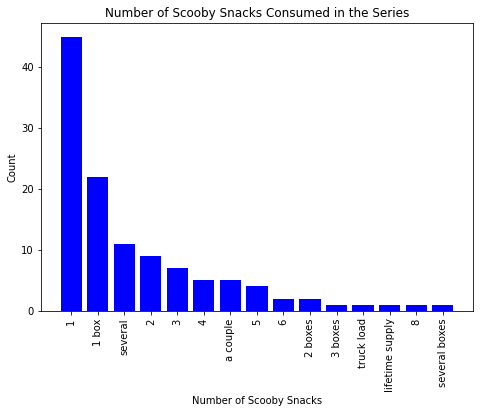

In [85]:
# hide

# Plotting
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.bar(snack_labels, number_snacks, color = 'blue')
plt.xticks(rotation = 90)
plt.xlabel('Number of Scooby Snacks')
plt.ylabel('Count')
plt.title('Number of Scooby Snacks Consumed in the Series')

Looking within the data, the mode number of Scooby Snacks consumed in the series is 1. In other words, we typically see one gang member eating at least 1 scooby snack per episode in the series. 

#### Who has consumed the most Scooby snacks over the course of the series? Who has consumed the least?

In [76]:
# hide

# Fred 
fred_snacks = scooby_df['snack_fred'].sum()

# Daphne
daphne_snacks = scooby_df['snack_daphnie'].sum()

# Velma
velma_snacks = scooby_df['snack_velma'].sum()

#Shaggy 
shaggy_snacks = scooby_df['snack_shaggy'].sum()

#Scooby
scooby_snacks = scooby_df['snack_scooby'].sum()

Text(0, 0.5, 'Count')

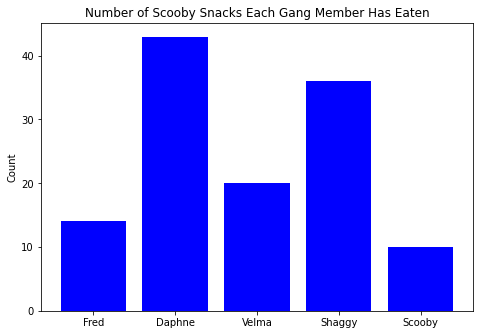

In [84]:
#hide

#Plotting
the_gang = ['Fred', 'Daphne', 'Velma', 'Shaggy', 'Scooby']
snack_consumption = [fred_snacks, daphne_snacks, velma_snacks, shaggy_snacks, scooby_snacks]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(the_gang, snack_consumption, color = 'blue')
plt.title('Number of Scooby Snacks Each Gang Member Has Eaten')
plt.ylabel('Count')

Shockingly, Daphne consumes the most Scooby Snacks over the course of the series and Scooby consumes the least. 

### Focused Analysis: Answering our Research Question

Here we answer the questions that will guide us to reveal the truths of our research question: Who is the strongest and weakest link among the Scooby-Doo Gang? 

#### Determining the number of times each Gang member has been abducted by Real and Fake Monsters in the Scooby-Doo Verse

In [109]:
#collapse_show

## Captured by Real Monsters
real_monster_df = scooby_df.loc[scooby_df['monster_real'] == True]


# Fred
fred_abducted_real = real_monster_df['captured_fred'].sum()

# Daphne

daphne_abducted_real = real_monster_df['captured_daphnie'].sum()

# Velma
velma_abducted_real = real_monster_df['captured_velma'].sum()

# Shaggy
shaggy_abducted_real = real_monster_df['captured_shaggy'].sum()

#Scooby
scooby_abducted_real = real_monster_df['captured_scooby'].sum()

In [113]:
#collapse_show

## Captured by Fake Monsters 
fake_monster_df = scooby_df.loc[scooby_df['monster_real'] == False]

# Fred
fred_abducted_fake = fake_monster_df['captured_fred'].sum()

# Daphne
daphne_abducted_fake = fake_monster_df['captured_daphnie'].sum()

# Velma
velma_abducted_fake = fake_monster_df['captured_velma'].sum()

# Shaggy
shaggy_abducted_fake = fake_monster_df['captured_shaggy'].sum()

#Scooby
scooby_abducted_fake = fake_monster_df['captured_shaggy'].sum()

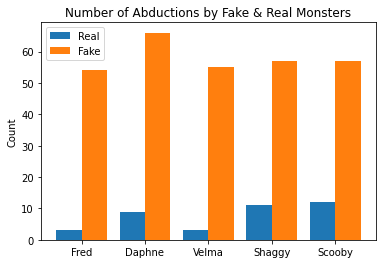

In [127]:
#collapse_show

real_abductions = [fred_abducted_real, daphne_abducted_real, velma_abducted_real, shaggy_abducted_real, scooby_abducted_real]
fake_abductions = [fred_abducted_fake, daphne_abducted_fake, velma_abducted_fake, shaggy_abducted_fake, scooby_abducted_fake]

x_axis = np.arange(len(the_gang))
plt.bar(x_axis - 0.2, real_abductions, 0.4, label = 'Real')
plt.bar(x_axis + 0.2, fake_abductions, 0.4,  label = 'Fake') 
plt.xticks(x_axis, the_gang)
plt.ylabel('Count')
plt.title('Number of Abductions by Fake & Real Monsters')
plt.legend(loc = 'upper left')
plt.show()

According to our visualization, it appears that Scooby Doo gets abducted by Real Monsters more often than any other gang member. On the other hand, Daphne appears to get abducted the most by Fake Monsters. This is a significant finding because Fake monsters are humans in disguise, while Real monsters are some supernatural entity. We presume that dealing with Real monsters is significantly more difficult than dealing with Fake monsters because of their supernatural abilities. Therefore, this finding shows that Daphne may be the weakest linkest since she is one of the members that is most often captured by Fake monsters & is the 3rd gang member to get abducted most often by Real Monsters. However, we continue our analysis below before coming to a decisive conclusion.

#### Determining the Rate of Successful Fake & Real Monsters by each Gang member 

In [145]:
# collapse_show

# Fred
fred_captured_real = real_monster_df['caught_fred'].sum()
fred_real_rate = (fred_captured_real / len(real_monster_df)) * 100

# Daphne

daphne_captured_real = real_monster_df['caught_daphnie'].sum()
daphne_real_rate = (daphne_captured_real / len(real_monster_df)) * 100

# Velma
velma_captured_real = real_monster_df['caught_velma'].sum()
velma_real_rate = (velma_captured_real / len(real_monster_df)) * 100

# Shaggy
shaggy_captured_real = real_monster_df['caught_shaggy'].sum()
shaggy_real_rate = (shaggy_captured_real / len(real_monster_df)) * 100

#Scooby
scooby_captured_real = real_monster_df['caught_scooby'].sum()
scooby_real_rate = (scooby_captured_real / len(real_monster_df)) * 100

In [163]:
# collapse_show

# Fred
fred_captured_fake = fake_monster_df['caught_fred'].sum()
fred_fake_rate = (fred_captured_fake / len(fake_monster_df)) * 100

# Daphne
daphne_captured_fake = fake_monster_df['caught_daphnie'].sum()
daphne_fake_rate = (daphne_captured_fake / len(fake_monster_df)) * 100

# Velma
velma_captured_fake = fake_monster_df['caught_velma'].sum()
velma_fake_rate = (velma_captured_fake / len(fake_monster_df)) * 100

# Shaggy
shaggy_captured_fake = fake_monster_df['caught_shaggy'].sum()
shaggy_fake_rate = (shaggy_captured_fake / len(fake_monster_df)) * 100

#Scooby
scooby_captured_fake = fake_monster_df['caught_scooby'].sum()
scooby_fake_rate = (scooby_captured_fake / len(fake_monster_df)) * 100

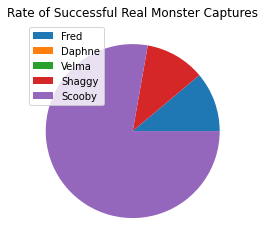

In [164]:
#collapse_show

## Plotting Rate of Capturing Real Monsters

real_rates = np.array([fred_real_rate, daphne_real_rate, velma_real_rate, shaggy_real_rate, scooby_real_rate])
plt.pie(real_rates)
plt.legend(labels = the_gang, loc = 'best')
plt.title('Rate of Successful Real Monster Captures')
plt.show()

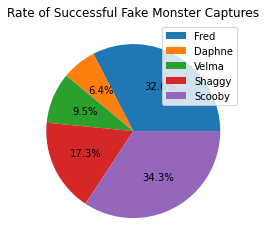

In [165]:
#collapse_show

## Plotting Rate of Capturing Fake Monsters

fake_rates = np.array([fred_fake_rate, daphne_fake_rate, velma_fake_rate, shaggy_fake_rate, scooby_fake_rate])
plt.pie(fake_rates, autopct='%1.1f%%')
plt.legend(labels = the_gang, loc = 'best')
plt.title('Rate of Successful Fake Monster Captures')
plt.show()

According to our pie plots, Fred appears to be the most successful at capturing Fake Monsters, while Scooby Doo appears to have the highest successful capture rate of Real Monsters & Fake Monsters. More importantly, it appears that Daphne & Velmna have no success in capturing Real monsters. This information brings us one step further to answering our research question. 

#### Determining the Number of Snacks each Gang member has consumed vs. the Number of Monsters they've captured 

Text(0.5, 1.0, 'Number of Monsters Captured vs. Number of Scooby Snacks Consumed')

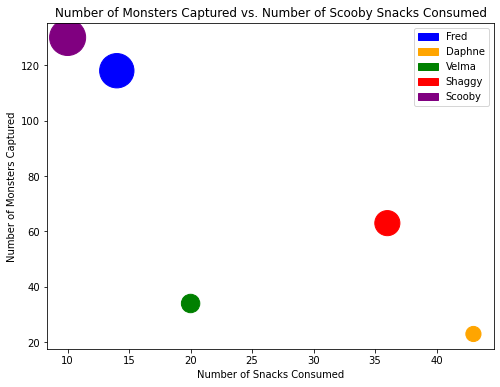

In [214]:
#collapse_show

# Total Number of Monster Captures of Each Gang Member
monster_captures = np.asarray([fred_captured_fake + fred_captured_real, daphne_captured_fake + daphne_captured_real, velma_captured_fake + velma_captured_real, shaggy_captured_fake + shaggy_captured_real, scooby_captured_fake + scooby_captured_real])
snackies = np.asarray(snack_consumption)

# Plotting
plt.figure(figsize = (8,6))
colors = np.array(['blue', 'orange', 'green', 'red', 'purple'])
categories = np.array([0, 1, 2, 3, 4])
blue_patch = mpatches.Patch(color = 'blue', label = 'Fred')
orange_patch =  mpatches.Patch(color = 'orange', label = 'Daphne')
green_patch = mpatches.Patch(color = 'green', label = 'Velma')
red_patch = mpatches.Patch(color = 'red', label = 'Shaggy')
purple_patch = mpatches.Patch(color = 'purple', label = 'Scooby')
scatter = plt.scatter(snack_consumption, monster_captures, s= monster_captures * 10, c = colors[categories], cmap = colors)
plt.xlabel('Number of Snacks Consumed')
plt.legend(handles = [blue_patch, orange_patch, green_patch, red_patch, purple_patch])
plt.ylabel('Number of Monsters Captured')
plt.title('Number of Monsters Captured vs. Number of Scooby Snacks Consumed')


This graph represents the correlation between Scooby Snacks consumed and the Number of Monsters captured. It appears that the more Scooby Snacks consumed, the lower the number of monsters captured. Daphne, who consumed the most Scooby Snacks appears to have caught the lowest number of monsters. Alternatively, Scooby-Doo who has consumed the least amount of Scooby Snacks has caught the most number of monsters. One outlier we have is Shaggy: who has consumed the second most number of Scooby-Snacks is 3rd highest in capturing Monsters. We evaluate these results in the next section.

## Discussion

This section discusses a summary of our findings and answers our research question. To reiterate, our research question is: Who is the strongest and weakest link among the Gang members of Scooby-Doo? Below is a summary of our analysis.

#### Who captures the most monsters, real and fake? Who captures the least?

- Scooby-Doo appears to have the highest successful capture rate of monsters, both real and fake. 
- Daphne & Velma have the lowest success rate in capturing Real Monsters. 
- Daphne has the lowest success rate in capturing Fake Monsters. 

#### Who gets abducted the most by real and fake monsters? Who gets abducted the least?

- Daphne appears to get abducted the most by fake monsters. Velma gets abducted the least by fake monsters. 
- Scooby-Doo appears to get abducted the most by real monsters. Velma & Fred get abducted the least by real monsters. 

#### Who eats the most Scooby-Snacks? The least?

- Daphne eats the most Scooby-Snacks. 
- Scooby-Doo eats the least amount of Scooby-Snacks. 

#### Does Scooby-Snack consumption improve Monster capture capabilities?

Our results may require further research. It appears that the more Scooby Snacks one consumes, the worse their ability is to capture monsters. Daphne who has eaten the most number of Scooby Snacks has the lowest monster capture rate. While, Scooby-Doo who has eaten the least amount of Scooby Snacks has the highest monster capture rate. However one outlier we have is Shaggy, who is the 3rd best at capturing monsters but is the 2nd person that consumes the most number of Scooby Snacks. Thus, our results for this question are undetermined because Shaggy could be a special case or Scooby Snack consumption has no effect on each gang member's capabilities. A more in-depth analysis of this question may be required in order to definitively determine whether Scooby Snack consumption improves or worsens capture abilities. 

Using these findings from our analysis, we are able to answer our research question. 

### Who is the strongest link among the Gang members of Scooby-Doo? Who is the weakest link? 

- Strongest Link: Scooby-Doo
- Weakest Link: Daphne

Taking real and fake monsters into consideration, we make the assumption that real monsters are more difficult to capture due to their supernatural abilities. Thus, we make the conclusion that Scooby-Doo is the strongest link among the gang members. Even though he gets abducted the most by real monsters, he has the highest capture rate for both real and fake monsters. Meaning that someway, somehow, Scooby-Doo is either extremely lucky or very powerful for subduing both powerful & formidable real monsters, and fake monsters disguised as humans as well. Alternatively, we conclude that Daphne is the weakest link among the Gang members. Daphne captures the least amount of both fake and real monsters, and gets abducted the most by less powerful fake monsters. 

Fan opinions may differ, but these are the results we come to based on our data. Further research may be required in order to determine why 'Danger Prone Daphne' is an easy target for fake monsters and how Scooby-Snacks affect monster capture rates. Many fans of the series also know that Scooby-Doo has an affinity for attracting real monsters & solving mysteries, but further research may also be conducted in order to determine the reasons behind his luck/unluckiness. This is just another mystery that we have on our hands. 